In [7]:
#UseCase: Given a customer data, if the customer has been using a blue credit card but his statistics match the profile
# of a Silver, Gold or Platinum card member then the bank can conatct such customers for card upgrade instead of approaching
# customers who are statistically unlikely to upgrade.

In [8]:
import sklearn
import xgboost
print(sklearn.__version__)
print(xgboost.__version__)

1.5.2
2.1.3


In [9]:
#pip uninstall scikit-learn

In [10]:
#pip install scikit-learn==1.5.2

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score,precision_score, recall_score
from custom_encoders import CategoricalEncoder

In [12]:
df = pd.read_csv(r"C:\Users\MOHAMMED ABDUL HAQ\Desktop\BankCustomers.csv")

In [13]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [16]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [17]:
df.shape

(10127, 21)

In [18]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

<Axes: xlabel='Card_Category', ylabel='Customer_Age'>

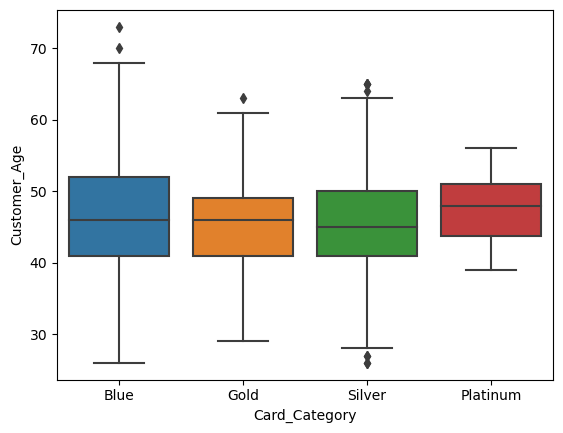

In [19]:
sns.boxplot(x = df['Card_Category'], y = df['Customer_Age'], data = df)

In [20]:
grouped_by_card = df[['Card_Category', 'Customer_Age']].groupby('Card_Category')

In [21]:
print('MEDIAN AGE')
print(grouped_by_card['Customer_Age'].median())
print("MAX AGE")
print(grouped_by_card['Customer_Age'].max())
print("MIN AGE")
print(grouped_by_card['Customer_Age'].min())

MEDIAN AGE
Card_Category
Blue        46.0
Gold        46.0
Platinum    48.0
Silver      45.0
Name: Customer_Age, dtype: float64
MAX AGE
Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64
MIN AGE
Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64


<Axes: xlabel='Card_Category', ylabel='count'>

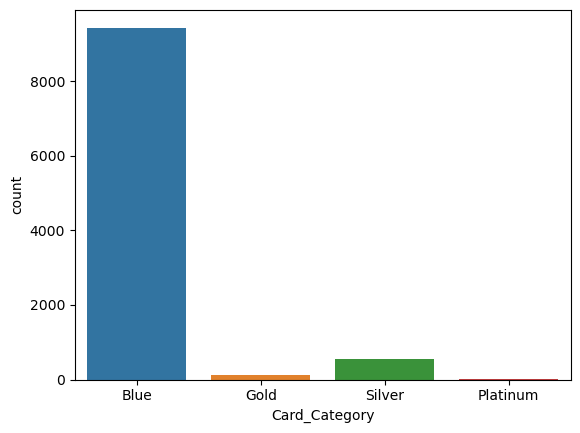

In [22]:
sns.countplot(x = df['Card_Category'])

In [23]:
grouped_by_card.count()

,Customer_Age
Card_Category,
Blue,9436
Gold,116
Platinum,20
Silver,555


<Axes: xlabel='Card_Category', ylabel='count'>

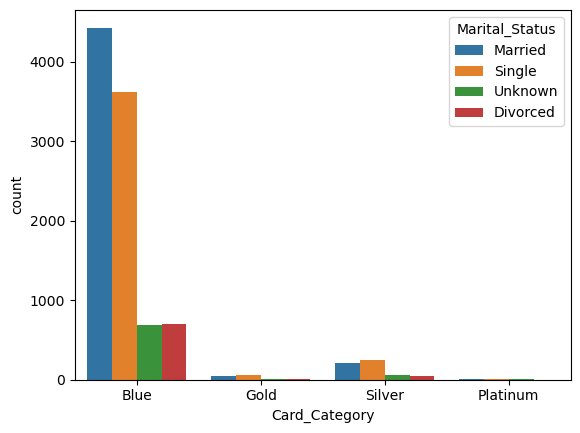

In [24]:
sns.countplot(x= df['Card_Category'], hue = df['Marital_Status'])

In [25]:
df.groupby('Marital_Status')['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: count, dtype: int64

In [26]:
df.groupby('Card_Category')['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [27]:
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [28]:
df.groupby('Gender')['Card_Category'].value_counts()

Gender  Card_Category
F       Blue             5101
        Silver            210
        Gold               38
        Platinum            9
M       Blue             4335
        Silver            345
        Gold               78
        Platinum           11
Name: count, dtype: int64

In [29]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

<Axes: xlabel='Income_Category', ylabel='count'>

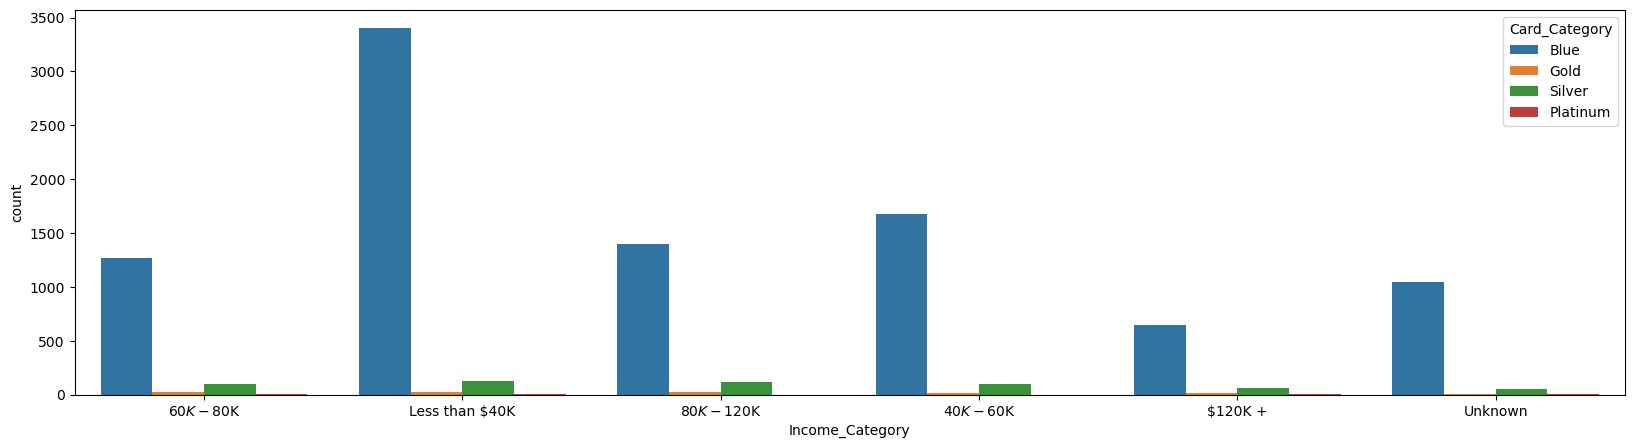

In [30]:
plt.figure(figsize = (20, 5))
sns.countplot(x = df['Income_Category'], hue = df['Card_Category'])

In [31]:
pd.DataFrame(df.groupby('Income_Category')[['Card_Category']].value_counts())

count
Income_Category Card_Category       
$120K +         Blue             645
                Silver            60
                Gold              18
                Platinum           4
$40K - $60K     Blue            1675
                Silver            99
                Gold              15
                Platinum           1
$60K - $80K     Blue            1273
                Silver            96
                Gold              29
                Platinum           4
$80K - $120K    Blue            1395
                Silver           117
                Gold              21
                Platinum           2
Less than $40K  Blue            3403
                Silver           130
                Gold              24
                Platinum           4
Unknown         Blue            1045
                Silver            53
                Gold               9
                Platinum           5

In [32]:
df.groupby('Gender')['Avg_Utilization_Ratio'].agg(['mean'])

,mean
Gender,
F,0.341957
M,0.199548


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [34]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [35]:
df['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

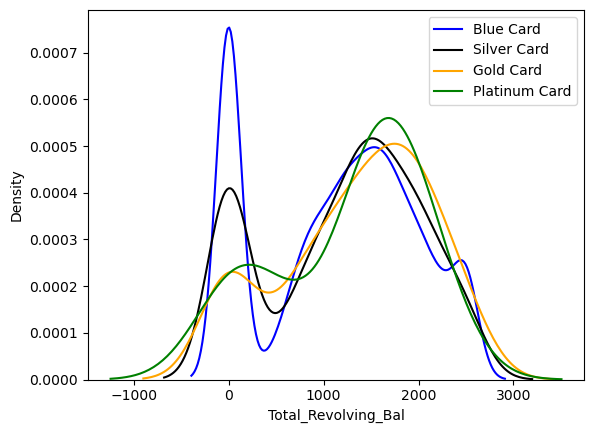

In [36]:
sns.kdeplot(data = df[df['Card_Category']=='Blue']['Total_Revolving_Bal'], fill = False, color = 'Blue', label = 'Blue Card')
sns.kdeplot(data = df[df['Card_Category']=='Silver']['Total_Revolving_Bal'], fill = False, color = 'Black', label = 'Silver Card')
sns.kdeplot(data = df[df['Card_Category']=='Gold']['Total_Revolving_Bal'], fill = False, color = 'Orange', label = 'Gold Card')
sns.kdeplot(data = df[df['Card_Category']=='Platinum']['Total_Revolving_Bal'], fill = False, color = 'Green', label = 'Platinum Card')
plt.legend()

In [37]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [38]:
x = df.copy()
y = df['Card_Category']

In [39]:
x = x.drop(columns = ['CLIENTNUM', 'Card_Category'])

In [40]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [41]:
x.shape

(10127, 19)

In [42]:
# def lbl_encode_col(col):
#     le = LabelEncoder()
#     le.fit(col)
#     print(col.name, le.classes_)
#     return le.transform(col)
#cant use label encoder in a column transformer because it only accepts one col at once hence this function

In [43]:
classes_to_lbl_encode = ['Attrition_Flag', 'Gender', 'Marital_Status','Education_Level', 'Income_Category']
continous_cols = ['Customer_Age','Months_on_book', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal' , 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1' , 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [44]:
# for col in classes_to_lbl_encode:
#     x[col] = lbl_encode_col(x[col])


In [45]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [47]:
x_train.shape

(8101, 19)

In [48]:
x_test.shape

(2026, 19)

In [49]:
cols_high_skew = ['Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1' ]

In [50]:
transformer1 = ColumnTransformer(transformers =[('std_scale', StandardScaler(), [1,7,9,11,12,13,14,15,16,17,18])], remainder = 'passthrough')
transformer2 = ColumnTransformer(transformers =[('func_trf', FunctionTransformer(func = np.log1p),[11,13,14,15,17])], remainder = 'passthrough')

In [51]:
pipe = Pipeline([
    ('categorical_encoder', CategoricalEncoder()),
    ('standard_scaler', ColumnTransformer(transformers=[
        ('std_scale', StandardScaler(), [1,7,9,11,12,13,14,15,16,17,18])
    ], remainder='passthrough')),
    ('log_transformer', ColumnTransformer(transformers=[
        ('func_trf', FunctionTransformer(func=np.log1p), [11,13,14,15,17])
    ], remainder='passthrough'))
])

In [52]:
x_train_trf = pipe.fit_transform(x_train,y_train)

In [53]:
x_test_trf = pipe.transform(x_test)

In [54]:
x_train_trf.shape

(8101, 19)

In [55]:
lojr = LogisticRegression(max_iter = 500)
lojr.fit(x_train_trf, y_train)
y_pred_lojr = lojr.predict(x_test_trf)
print("accuracy score : ", accuracy_score(y_test,y_pred_lojr))
print("f1 score : ", f1_score(y_test,y_pred_lojr, average='weighted'))
#print("precision score : ",precision_score(y_test,y_pred_lojr, average='weighted'))
print("recall score : ", recall_score(y_test,y_pred_lojr, average='weighted'))

accuracy score :  0.9343534057255676
f1 score :  0.9198399296464798
recall score :  0.9343534057255676


In [56]:
rf_clf = RandomForestClassifier(n_estimators = 800, n_jobs = -1, class_weight='balanced')
rf_clf.fit(x_train_trf, y_train)
y_pred_rf = rf_clf.predict(x_test_trf)
y_pred_trn = rf_clf.predict(x_train_trf)

print("accuracy score : ", accuracy_score(y_test,y_pred_rf))
print("f1 score : ", f1_score(y_test,y_pred_rf, average='weighted'))
#print("precision score : ",precision_score(y_test,y_pred_rf, average='weighted'))
print("recall score : ", recall_score(y_test,y_pred_rf, average='weighted'))


#score without weighted classes 
# accuracy score :  0.9526159921026653
# f1 score :  0.9454728295770662
# precision score :  0.938636251262157
# recall score :  0.9526159921026653


accuracy score :  0.9402764067127345
f1 score :  0.9239406422865949
recall score :  0.9402764067127345


In [57]:
svc_clf1 = SVC(kernel = 'linear')
svc_clf1.fit(x_train_trf, y_train)
y_pred_svc1 = svc_clf1.predict(x_test_trf)
print("accuracy score : ", accuracy_score(y_test,y_pred_svc1))
print("f1 score : ", f1_score(y_test,y_pred_svc1, average='weighted'))
print("recall score : ", recall_score(y_test,y_pred_svc1, average='weighted'))

svc_clf2 = SVC(kernel = 'rbf')
svc_clf2.fit(x_train_trf, y_train)
y_pred_svc2 = svc_clf2.predict(x_test_trf)
print("accuracy score : ", accuracy_score(y_test,y_pred_svc2))
print("f1 score : ", f1_score(y_test,y_pred_svc2, average='weighted'))
print("recall score : ", recall_score(y_test,y_pred_svc2, average='weighted'))

svc_clf3 = SVC(kernel = 'poly', degree = 5)
svc_clf3.fit(x_train_trf, y_train)
y_pred_svc3 = svc_clf3.predict(x_test_trf)
print("accuracy score : ", accuracy_score(y_test,y_pred_svc3))
print("f1 score : ", f1_score(y_test,y_pred_svc3, average='weighted'))
print("recall score : ", recall_score(y_test,y_pred_svc3, average='weighted'))

accuracy score :  0.9274432379072063
f1 score :  0.8925305219091628
recall score :  0.9274432379072063
accuracy score :  0.9333662388943732
f1 score :  0.9085099169092223
recall score :  0.9333662388943732
accuracy score :  0.9333662388943732
f1 score :  0.9231268113195051
recall score :  0.9333662388943732


In [58]:
y.value_counts()
#target classes are imbalanced hence rf is performing better than svc

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [59]:
#xgb takes encoded target variables only not text

le_xgb = LabelEncoder()
y_train_xgb = le_xgb.fit_transform(y_train)
y_test_xgb = le_xgb.transform(y_test)

In [60]:
#computing class weights

from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(y_train_xgb)
class_weights = compute_class_weight('balanced', classes = classes, y = y_train_xgb)
class_weight_dict = dict(zip(classes, class_weights))
weights = [class_weight_dict[label] for label in y_train_xgb]

In [62]:
gb_clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 7)
gb_clf.fit(x_train_trf, y_train_xgb, sample_weight= weights)
y_pred_gb = gb_clf.predict(x_test_trf)
print(accuracy_score(y_test_xgb,y_pred_gb))
print("f1 score : ", f1_score(y_test_xgb,y_pred_gb, average='weighted'))
print("precision score : ",precision_score(y_test_xgb,y_pred_gb, average='weighted'))
print("recall score : ", recall_score(y_test_xgb,y_pred_gb, average='weighted'))

#Classifier without class weights - causes some classes to not get any predictions
# gb_clf.fit(x_train_trf, y_train, sample_weight= weights)
# y_pred_gb = gb_clf.predict(x_test_trf)
#print(accuracy_score(y_test,y_pred_gb))


0.9639684106614018
f1 score :  0.9652051950821573
precision score :  0.9673450679527203
recall score :  0.9639684106614018


In [123]:
x_test.iloc[324]

Attrition_Flag                  1.000
Customer_Age                   52.000
Gender                          0.000
Dependent_count                 2.000
Education_Level                 2.000
Marital_Status                  1.000
Income_Category                 1.000
Months_on_book                 42.000
Total_Relationship_Count        3.000
Months_Inactive_12_mon          3.000
Contacts_Count_12_mon           2.000
Credit_Limit                19220.000
Total_Revolving_Bal             0.000
Avg_Open_To_Buy             19220.000
Total_Amt_Chng_Q4_Q1            0.997
Total_Trans_Amt              4642.000
Total_Trans_Ct                 81.000
Total_Ct_Chng_Q4_Q1             0.761
Avg_Utilization_Ratio           0.000
Name: 7364, dtype: float64

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb_clf = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', scoring='f1_weighted')

In [65]:
# param_grid = param_grid = {
#     'n_estimators': [200,300,400,500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7,9]
# }
# grid_search = GridSearchCV(estimator = xgb_clf, param_grid = param_grid, n_jobs = -1, cv = 5, scoring = 'f1_weighted')
# grid_search.fit(x_train_trf, y_train_xgb)
# print(f"best_parameters:{grid_search.best_params_}")
#final_xgb_clf = grid_search.best_estimator_

In [66]:
#with weighted classes

#y_pred_final_xgb = final_xgb_clf.predict(x_test_trf)
xgb_model1 = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', n_estimators = 400, max_depth = 5, learning_rate = 0.01)
xgb_model1.fit(x_train_trf, y_train_xgb, sample_weight= weights)
y_pred_xgb_weighted = xgb_model1.predict(x_test_trf)

print("accuracy score : ", accuracy_score(y_test_xgb,y_pred_xgb_weighted))
print("f1 score : ", f1_score(y_test_xgb,y_pred_xgb_weighted, average='weighted'))
print("precision score : ",precision_score(y_test_xgb,y_pred_xgb_weighted, average='weighted'))
print("recall score : ", recall_score(y_test_xgb,y_pred_xgb_weighted, average='weighted'))

c:\Users\.\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy score :  0.9590325765054294
f1 score :  0.9651336579914264
precision score :  0.9730264187212556
recall score :  0.9590325765054294


In [148]:
#without weighted classses

#y_pred_final_xgb = final_xgb_clf.predict(x_test_trf)
# xgb_model1 = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', n_estimators = 400, max_depth = 5, learning_rate = 0.01)
# xgb_model1.fit(x_train_trf, y_train_xgb)
# y_pred_xgb_weighted = xgb_model1.predict(x_test_trf)
# print(accuracy_score(y_test_xgb,y_pred_xgb_weighted))
# print(f1_score(y_test_xgb,y_pred_xgb_weighted, average='weighted'))
# #print(precision_score(y_test_xgb,y_pred_xgb_weighted, average='weighted'))
# print(recall_score(y_test_xgb,y_pred_xgb_weighted, average='weighted'))

In [67]:
import pickle
with open(r'C:\Users\MOHAMMED ABDUL HAQ\Desktop\bankCard_predict_modelF.pkl','wb') as f:
    #pickle.dump(final_xgb_clf, f)
    pickle.dump(xgb_model1, f)
with open(r'C:\Users\MOHAMMED ABDUL HAQ\Desktop\bankCard_le_encod_targetF.pkl', 'wb') as g:
    pickle.dump(le_xgb, g)
with open(r'C:\Users\MOHAMMED ABDUL HAQ\Desktop\bankCard_preprocess_pipeF.pkl', 'wb') as h:
    pickle.dump(pipe, h)